In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import os

In [3]:
path = "./dataset/data/DeepPCB/PCBData/defects"

In [4]:
datagenAug = ImageDataGenerator(
    rotation_range=90,
	zoom_range=0.15,
	horizontal_flip=True,
	vertical_flip=True,
	validation_split=0.2
)

In [5]:
trainGen = datagenAug.flow_from_directory(
    path, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(150, 150), 
    color_mode='grayscale',
    class_mode="sparse",
    batch_size=32, 
    subset="training")

testGen = datagenAug.flow_from_directory(
    path, 
    classes=["open", "short", "mousebit", 
             "spur", "copper", "pin-hole"],
    target_size=(150, 150), 
    color_mode='grayscale',
    class_mode="sparse",
    batch_size=32, 
    subset="validation")


Found 8012 images belonging to 6 classes.
Found 2001 images belonging to 6 classes.


In [6]:
trainGen.image_shape

(150, 150, 1)

In [7]:
trainGen.classes

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.model_selection import train_test_split

In [9]:
model = Sequential()

In [10]:
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(150,150,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax'))

c:\ProgramData\anaconda3\envs\PCB_CNN\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     8,761,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,781,122 (33.50 MB)

 Trainable params: 8,781,122 (33.50 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [13]:
checkpoint = ModelCheckpoint('./best-cnn-model.keras', save_best_only=True)
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

In [14]:
history = model.fit(trainGen,
                    epochs=20,
                    validation_data=testGen,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/20


c:\ProgramData\anaconda3\envs\PCB_CNN\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 87s 337ms/step - accuracy: 0.4727 - loss: 48.3429 - val_accuracy: 0.8796 - val_loss: 0.3410
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 201ms/step - accuracy: 0.7578 - loss: 0.6349 - val_accuracy: 0.9225 - val_loss: 0.2359
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.8187 - loss: 0.5333 - val_accuracy: 0.9465 - val_loss: 0.1799
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 203ms/step - accuracy: 0.8334 - loss: 0.4557 - val_accuracy: 0.9610 - val_loss: 0.1393
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 51s 204ms/step - accuracy: 0.8508 - loss: 0.4096 - val_accuracy: 0.9670 - val_loss: 0.1418
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 205ms/step - accuracy: 0.8749 - loss: 0.3701 - val_accuracy: 0.9690 - val_loss: 0.1259
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 52s 205ms/step - accuracy: 0.8738 - loss: 0.3774 - val_accuracy: 0.9750 - val_loss: 0.1099
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 53s 208ms/step - accuracy: 0.8838 - loss: 0.3468 - va

In [15]:
import numpy as np

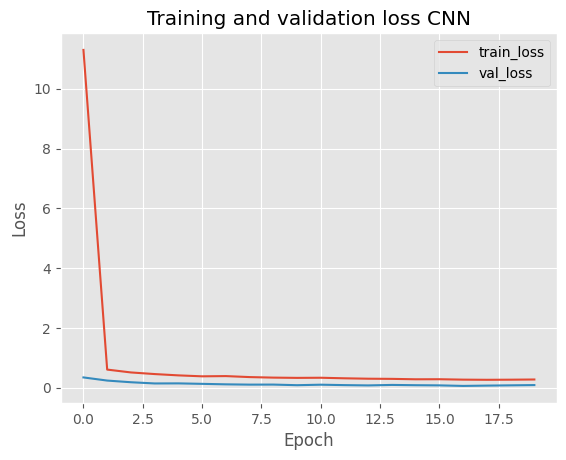

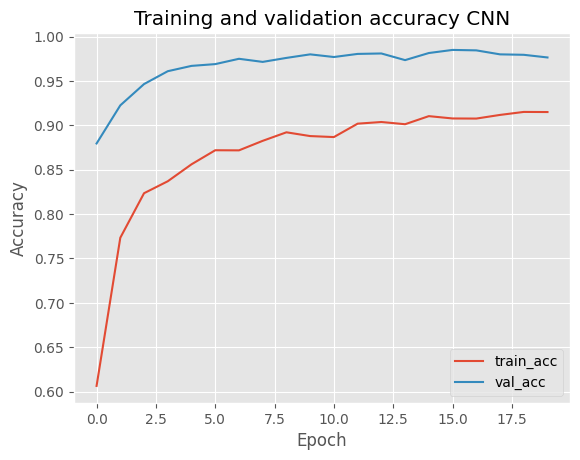

In [16]:
N = np.arange(0, 20)

plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training and validation loss CNN")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.figure()
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and validation accuracy CNN")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()